# Trabalho prático Interação e Concorrência      2020/2021

Ricardo Silva a71532

José Barbosa a69136

### Resumo:
Neste trabalho temos de implementar um algoritmo em Quiskit para encontrar o número associado ao nosso grupo numa lista.O número do nosso grupo é o 11, teremos que encontrar o qubit |011>,pois 3 ≡ 11 mod 8 e 3 = 2^1 + 2^0. Como a lista de numeros varia entre 0 e 7 serão nessessarios 3 qubits.

### Problema:
Each group of students has a number assigned, N. Now, you have to use a quantum algorithm to find s

$$ s=N mod8$$

Implement the correct algorithm in a Jupyter Notebook file. Each work
should contain (and will be evaluated on) the following steps:

**1 - Division of the algorithm into sections; Utilisation of the state vector simulator to explain each step (special attention to the oracle);**

Algoritmo de Grover

<img src="https://scx2.b-cdn.net/gfx/news/2018/groversearch.jpg" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="800 px" align="center">

-Inicialização;

-Oráculo;

-Amplificação.

Optamos por implementar o algoritmo de Grover.
Consideremos então uma lista constituída por elementos de 0 a 7, isto é, 000 a 111. Pretendemos localizar um objeto em particular, o 011. Portanto, temos:

|$0$|$0$|$0$|$1$|$0$|$0$|$0$|$0$|
|-|-|-|-|-|-|-|-|
|$000$|$001$|$010$|$011$|$100$|$101$|$110$|$111$|

O algoritmo de Grover necessida de um Oráculo. Uma forma simples de codificar a função do Oráculo é:

$$ 𝑓(𝑥) = 0$$
$$ 𝑓(w) = 0$$

### Inicialização

In [106]:
from qiskit import *
%matplotlib inline 
from qiskit.tools.visualization import *

In [107]:
barriers=barriers = True
#Step 0
nqubits=3

#Criar circuito
qc=QuantumCircuit(nqubits)

In [108]:
#inicializar o sistema com a mesma amplitude 
#em todos os estados de entrada possíveis.
#aplicar as portas de Hadammard aos qubits
#de forma a criar uma sobreposição uniforme

for q in range(nqubits):
    qc.h(q)

if barriers:
    qc.barrier()

### Oraculo
O Oráculo identifica a solução para o problema, ou seja, o qubit |011⟩. Então, a fase do estado |011⟩ faz uma rotação de 𝜋 radianos. Essa transformação significa que a amplitude do estado |011⟩ ficou negativa o que significa que a amplitude média foi reduzida.Para definir o oráculo, para além da Haddammard gate, recorremos a Pauli-X gate e a Controlled-X gate.

In [109]:
#Step 2: Marcar estado |011>  usando o oraculo:
qc.h(0)
qc.x(2)
qc.ccx(2,1,0)
qc.h(0)
qc.x(2)

if barriers:
    qc.barrier()

### Amplificação
Nesta fase aumenta a amplitude do qubit e volta a inverte-lo.

In [110]:
#Step 3:  Realizar a reflexão em torno da amplitude média

#Aplicar Hadamard e X gates aos qubits

for q in range(nqubits):
    qc.h(q)
    qc.x(q)
    
#Aplicar a doubly controlled Z gate entre qubits
qc.h(0)
qc.ccx(2,1,0)
qc.h(0)
# Aplicar X gates e Hadamard gates aos qubits
for q in range(nqubits):
    qc.x(q)
    qc.h(q)

In [111]:
import math as m
times=m.sqrt(2**(nqubits))
print(times)

2.8284271247461903


In [112]:
#Step 4: Repetir step 3 e step 2 de modo a aproximar a medida 
#ideal e obter bons resultados.
qc.h(0)
qc.x(2)
qc.ccx(2,1,0)
qc.h(0)
qc.x(2)
if barriers:
    qc.barrier()

for q in range(nqubits):
    qc.h(q)
    qc.x(q)

qc.h(0)
qc.ccx(2,1,0)
qc.h(0)

for q in range(nqubits):
    qc.x(q)
    qc.h(q)
    

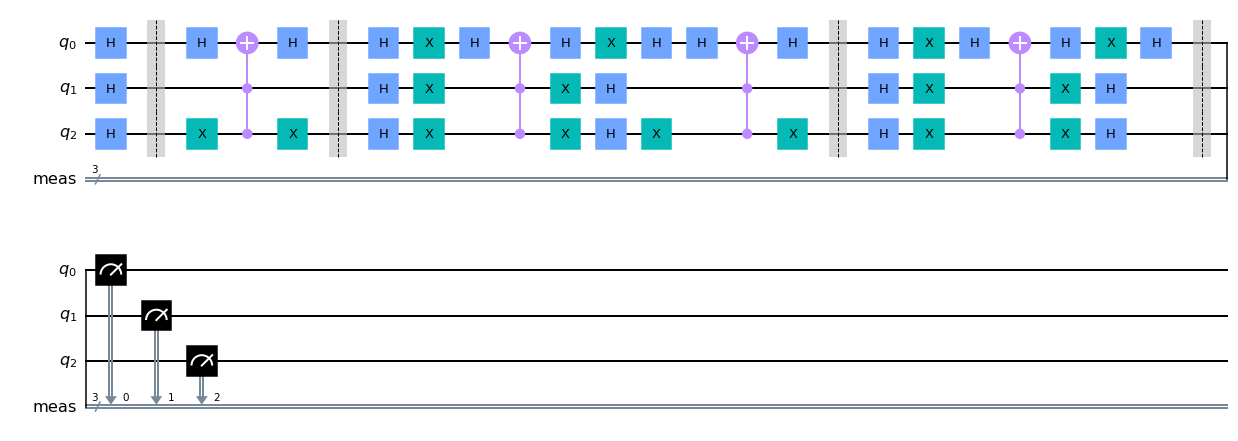

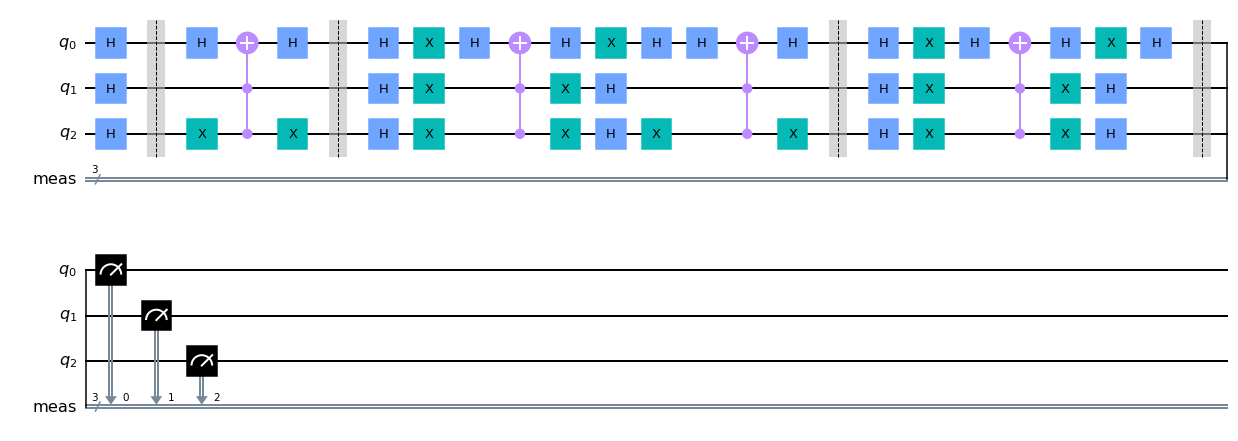

In [113]:
#Step 5: Medir os 3 qubits para receber estados |011>
qc.measure_all()
qc.draw(output='mpl')

**2 - Application of noise simulator to predict the best optimisation;**

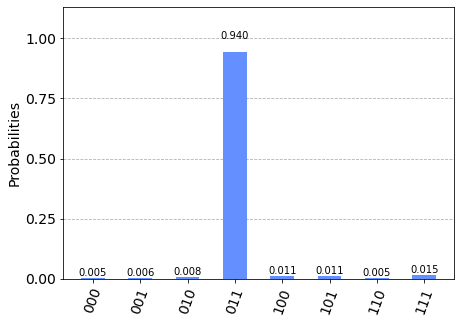

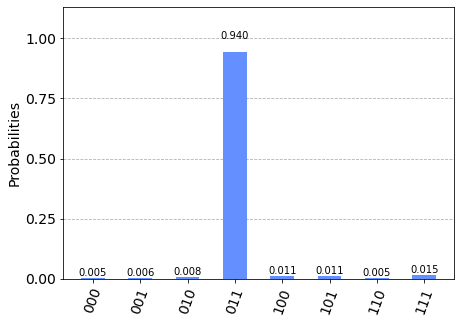

In [114]:
backend=Aer.get_backend('qasm_simulator')
shots=1024
#Executa a lista de circuitos quânticos no backend e guarda o resultado
results=execute(qc, backend=backend, shots=shots).result()
#Obter os dados para o histograma
answer=results.get_counts(qc)
#Desenhar o histograma
plot_histogram(answer)

In [115]:
#calcula a profundidade do circuito
qc.depth()

22

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


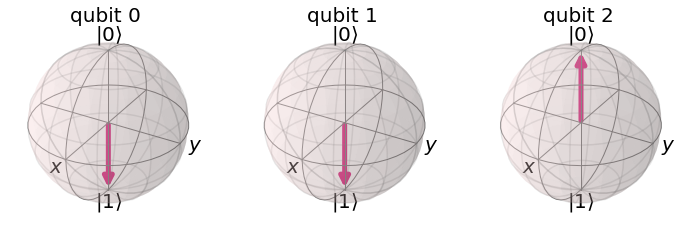

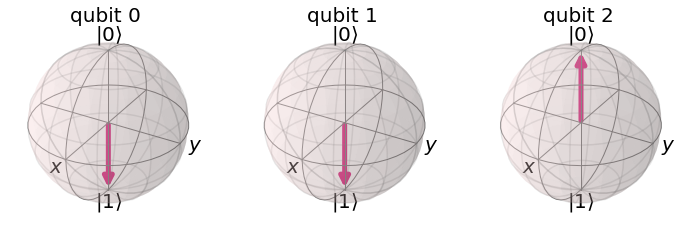

In [116]:
backend_state = Aer.get_backend('statevector_simulator')
#Executa a lista de circuitos quânticos no backend e guarda o resultado
result = execute(qc, backend_state).result() #Obtém o statevector final de um circuito quântico
psi2 = result.get_statevector(qc)
#Desenho das esferas de Bloch e as respetivas projeções em cada eixo
plot_bloch_multivector(psi2)

In [117]:
psi2.real

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0., -0.])

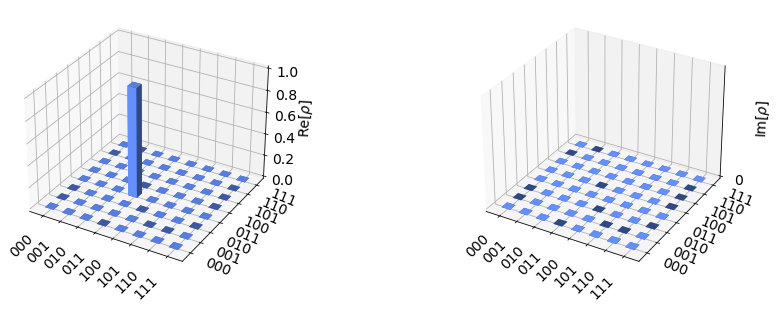

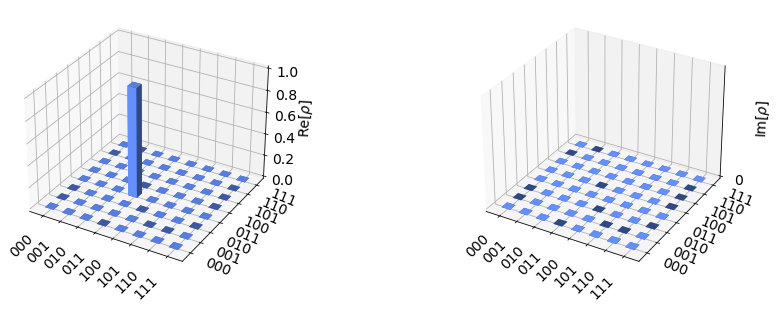

In [118]:
#Traça dois gráficos com barras 3D (bidimensionais) da parte real # e parte imaginária da matriz de densidade
plot_state_city(psi2)

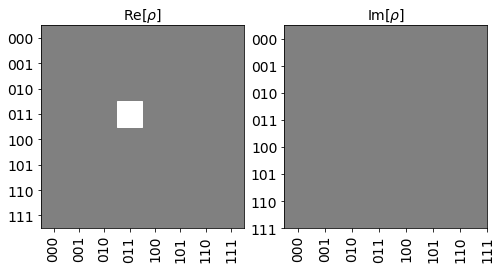

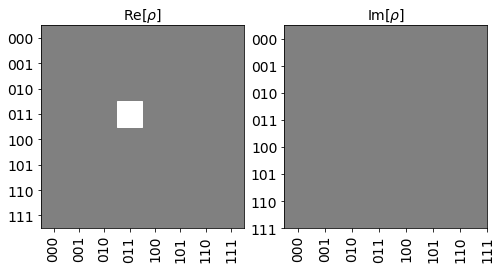

In [119]:
#Faz um diagrama de hinton para o estado quântico
plot_state_hinton(psi2)

**3 - Execution in an IBM Q backend.**

In [120]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy

# Carrega as informações da conta local e as respectivas máquinas associadas. 
provider = IBMQ.load_account()
provider.backends()

ibmqfactory.load_account:WARNING:2021-06-05 23:13:48,562: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') fr

In [121]:
# Backend overview
import qiskit.tools.jupyter
%qiskit_backend_overview

In [122]:
from qiskit.tools.monitor import backend_overview, backend_monitor
#Fornece informações gerais de todos os backends do IBMQ que estão disponíveis
backend_overview()

ibmq_manila                  ibmq_quito                   ibmq_belem
-----------                  ----------                   ----------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 14             Pending Jobs: 7              Pending Jobs: 1
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      145.8          Avg. T1:      75.2           Avg. T1:      79.3
Avg. T2:      67.0           Avg. T2:      73.2           Avg. T2:      91.6



ibmq_lima                    ibmq_santiago                ibmq_athens
---------                    -------------                -----------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 10             Pending Jobs: 7              Pending Jobs: 0
Least busy:   False          Least busy:   False          Least busy:   True
Operational:  True           Operatio

In [123]:
#Seleciona uma máquina
backend_device = provider.get_backend('ibmq_quito') 
print("Running on: ", backend_device)

Running on:  ibmq_quito


<IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>

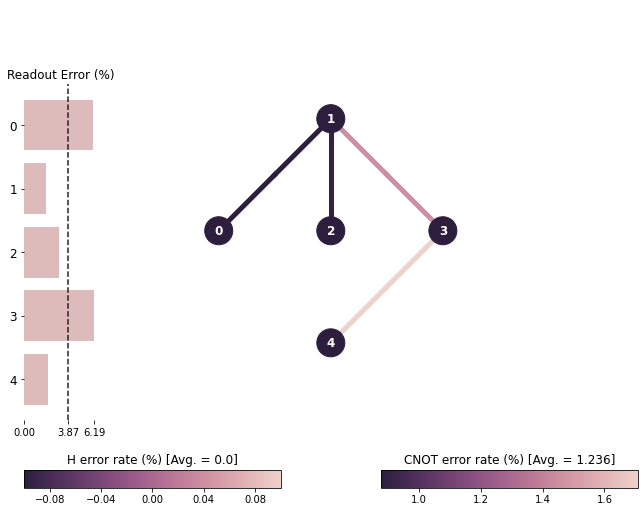

In [124]:
#Obtém informação sobre o backend

backend_device

In [125]:
backend_monitor(backend_device)

ibmq_quito
Configuration
-------------
    n_qubits: 5
    operational: True
    status_msg: active
    pending_jobs: 6
    backend_version: 1.1.2
    basis_gates: ['id', 'rz', 'sx', 'x', 'cx', 'reset']
    local: False
    simulator: False
    default_rep_delay: 250.0
    open_pulse: False
    qubit_channel_mapping: [['u0', 'm0', 'u1', 'd0'], ['u3', 'u4', 'u1', 'u0', 'm1', 'u2', 'u5', 'd1'], ['d2', 'm2', 'u4', 'u2'], ['u3', 'm3', 'd3', 'u5', 'u6', 'u7'], ['d4', 'm4', 'u6', 'u7']]
    description: 5 qubit device Quito
    pulse_num_channels: 9
    coupling_map: [[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 4], [4, 3]]
    dynamic_reprate_enabled: True
    backend_name: ibmq_quito
    allow_q_object: True
    meas_levels: [1, 2]
    supported_instructions: ['u3', 'u1', 'setf', 'acquire', 'delay', 'x', 'play', 'measure', 'rz', 'sx', 'id', 'u2', 'shiftf', 'reset', 'cx']
    max_experiments: 75
    credits_required: True
    n_uchannels: 8
    hamiltonian: {'description': 'Qubits ar

In [126]:
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [127]:
#Executa a lista de circuitos quânticos no backend e guarda o resultado
job_r = execute(qc, backend_device, shots=shots) 
jobID_r = job_r.job_id()
print('JOB ID: {}'.format(jobID_r))

JOB ID: 60bc067125cc6e3ffe65cb06


In [128]:
#ibmq_quito 1 times the oracle:
job_get=backend_device.retrieve_job("60bc067125cc6e3ffe65cb06")
result_r = job_get.result()
counts_run = result_r.get_counts(qc)

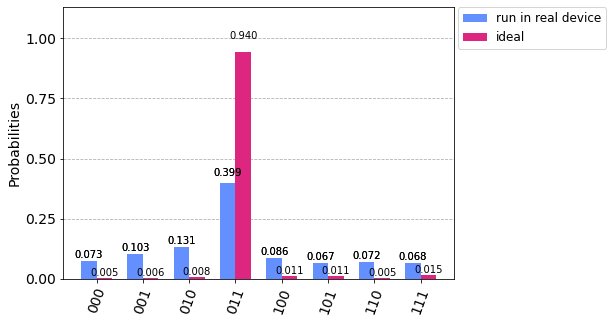

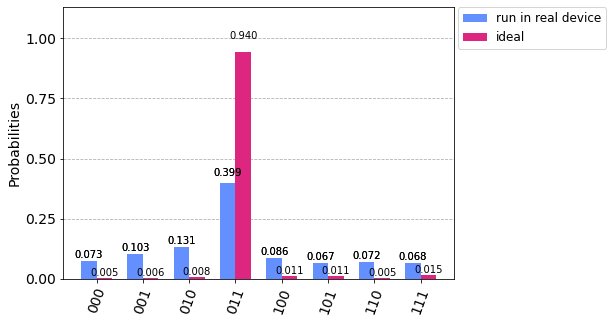

In [129]:
 plot_histogram([counts_run, answer ], legend=[ 'run in real device', 'ideal'])

**4 - Mitigation of Error with Ignis.**

Neste capitulo vamos tratar os erros com recurso ao módulo Ignis.

Sendo a computação quantica constituida por estados frageis, devido à sobreposição de qubits, este tipo de programação implica a possibilidade da existencia de ruido.
O ruído pode aparecer aleatoriamente e fazer com que um qubit decaia do estado |1> para |0>.

In [130]:
# Importe das funções de calibração
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, tensored_meas_cal,
                                                 CompleteMeasFitter, TensoredMeasFitter)

Gerar uma lista de circuitos de calibração de medição.
Cada circuito cria um estado básico.
Uma vez que medimos 3 qubits, precisamos de 2^3 = 8
circuitos de calibração.

In [131]:
# Gerar os circuitos de calibração
qr = QuantumRegister(nqubits)

# meas_calibs:
# list of quantum circuit objects containing the calibration circuits
# state_labels:
# calibration state labels
meas_calibs, state_labels = complete_meas_cal(qubit_list=[0,1,2], qr=qr, circlabel='mcal')

In [132]:
state_labels

['000', '001', '010', '011', '100', '101', '110', '111']

Calcular a matriz de calibração

In [133]:
job_ignis = execute(meas_calibs, backend=backend_device, shots=shots)

jobID_run_ignis = job_ignis.job_id()

print('JOB ID: {}'.format(jobID_run_ignis))

JOB ID: 60bc0bf500aded86776a7462


In [134]:
job_get=backend_device.retrieve_job("60bc0bf500aded86776a7462")

cal_results = job_get.result()

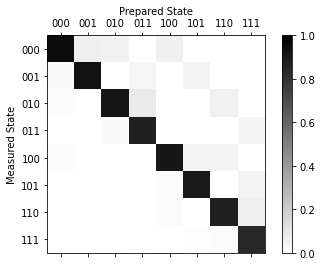

In [135]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel='mcal')

# Plot the calibration matrix
meas_fitter.plot_calibration()

In [136]:
# What is the measurement fidelity?
print("Average Measurement Fidelity: %f" % meas_fitter.readout_fidelity())


Average Measurement Fidelity: 0.896851


Aplicar a Calibração

In [137]:
# Get the filter object
meas_filter = meas_fitter.filter

# Results with mitigation
mitigated_results = meas_filter.apply(result_r)
mitigated_counts = mitigated_results.get_counts()


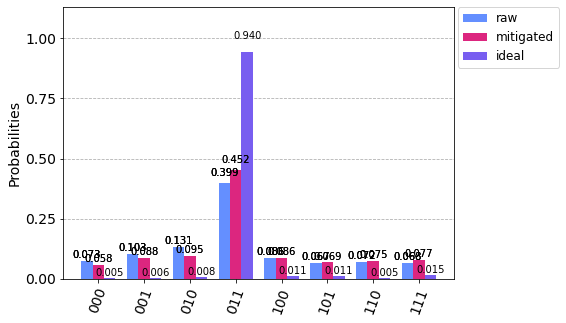

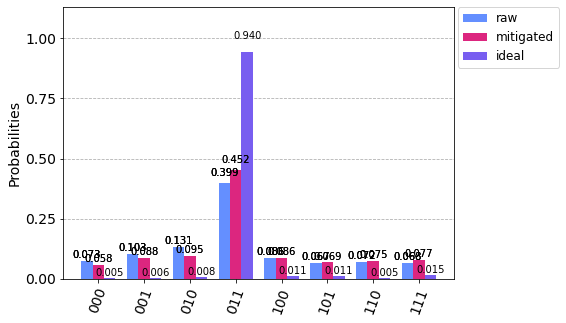

In [138]:
plot_histogram([counts_run, mitigated_counts, answer], legend=['raw', 'mitigated', 'ideal'])
